In [4]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')


In [8]:
data = pd.read_csv('D:\ArhamDQ-lab\WEB PROGRAMING\Course Simplilearn\Machine Learning\Demo Datasets\Lesson 8/AirPassengers.csv')

In [9]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
data['Month'] = data['Month'].apply(lambda x: dt(int(x[:4]), int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [13]:
ts =  data['#Passengers']

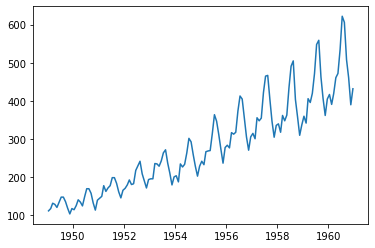

In [14]:
plt.plot(ts)

In [15]:
#lalukan dickifuller test untuk melihat data apakah sudah stationer atau belum jika tdk yakin dgan plot

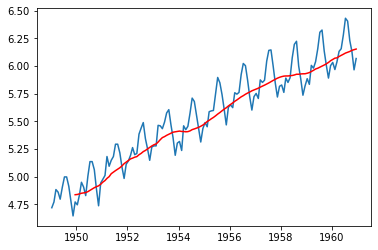

In [20]:
#kerana data tidak stationer maka dilakukan diffrencing
ts_log = np.log(ts)

movingaverage = ts_log.rolling(window=12).mean()
movingstd = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingaverage, color = 'red')

In [21]:
ts_log_mv_diff = ts_log - movingaverage
ts_log_mv_diff.dropna(inplace = True)

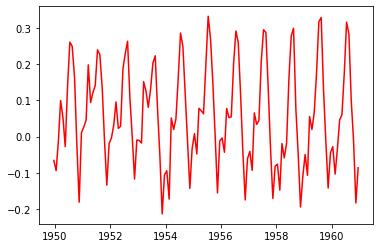

In [23]:
plt.plot(ts_log_mv_diff,color = 'red')

In [24]:
#lakukan stationery cek lagi, menggunakan dickyfuller

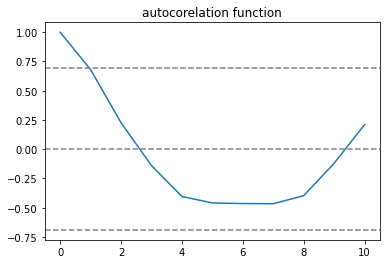

In [25]:
# plot acf dan pacf 

plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('autocorelation function')
plt.show()

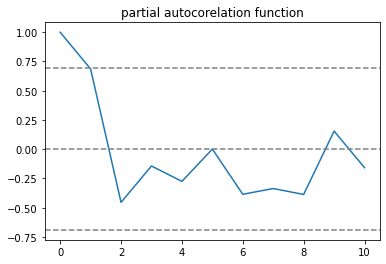

In [26]:
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('partial autocorelation function')
plt.show()

Text(0.5, 1.0, 'RSS: nan')

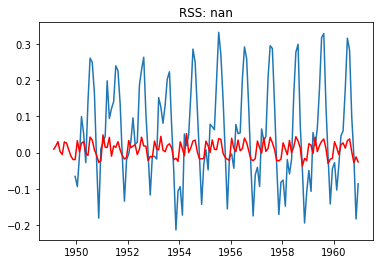

In [28]:
#build model

model = ARIMA(ts_log,order=(1,1,0))
result_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_mv_diff)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_ARIMA.fittedvalues[1:]-ts_log_mv_diff)**2))


In [30]:
prediction_arima = pd.Series(result_ARIMA.fittedvalues,copy=True)
prediction_arima.head()

Month
1949-02-15    0.009676
1949-03-15    0.018164
1949-04-15    0.030130
1949-05-15    0.003154
1949-06-15   -0.005039
dtype: float64

In [31]:
prediction_arima_diff_cumsum = prediction_arima.cumsum()
prediction_arima_diff_cumsum.head()

Month
1949-02-15    0.009676
1949-03-15    0.027839
1949-04-15    0.057969
1949-05-15    0.061123
1949-06-15    0.056084
dtype: float64

In [34]:
prediction_arima_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
prediction_arima_log = prediction_arima_log.add(prediction_arima_diff_cumsum,fill_value=0)
prediction_arima_log.head()

Month
1949-01-15    4.718499
1949-02-15    4.728175
1949-03-15    4.746338
1949-04-15    4.776468
1949-05-15    4.779622
dtype: float64

Text(0.5, 1.0, 'RMSE: 52.1841')

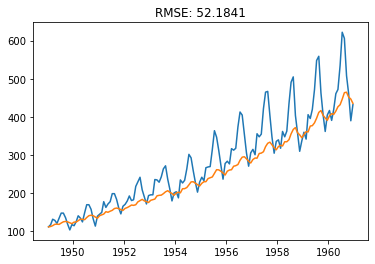

In [40]:
prediction_ARIMA = np.exp(prediction_arima_log)
plt.plot(ts)

plt.plot(prediction_ARIMA)
plt.title('RMSE: %.4f'%np.sqrt(sum((prediction_ARIMA-ts)**2)/len(ts)))